In [1]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 5.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 5.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 5.7 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.1 MB/s  0:00:02
   ---------------------------------------- 0.0/810.4 kB ? eta

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
!pip install supervision

Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [supervision]
   -------------------- ------------------- 1/2 [supervision]
   -------------------- ------------------- 1/2 [supervision]
   -------------------- ------------------- 1/2 [supervision]
   ---------------------------------------- 2/2 [supervision]



In [3]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [4]:
pip install yt-dlp

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.3 MB ? eta -:--:--
   --------- ------------------------------ 0.8/3.3 MB 2.4 MB/s eta 0:00:02
   --------------- ------------------------ 1.3/3.3 MB 2.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.8/3.3 MB 2.4 MB/s eta 0:00:01
   ------------------------- -------------- 2.1/3.3 MB 2.3 MB/s eta 0:00:01
   ------------------------------- -------- 2.6/3.3 MB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 3.1/3.3 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 2.2 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import yt_dlp

url = "https://youtube.com/shorts/c-djMIii9jQ?si=CwUBM02KDASwe7U8"

ydl_opts = {
    'format': 'mp4',
    'outtmpl': 'video.mp4'
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])


[youtube] Extracting URL: https://youtube.com/shorts/c-djMIii9jQ?si=CwUBM02KDASwe7U8
[youtube] c-djMIii9jQ: Downloading webpage


[youtube] c-djMIii9jQ: Downloading android vr player API JSON
[info] c-djMIii9jQ: Downloading 1 format(s): 18
[download] Destination: video.mp4
[download] 100% of  797.75KiB in 00:00:01 at 786.28KiB/s 


In [7]:
from ultralytics import YOLO
import cv2

model = YOLO("yolov8n.pt")

cap = cv2.VideoCapture("video.mp4")

# check video opened
if not cap.isOpened():
    print("Video not found")
    
width = int(cap.get(3))
height = int(cap.get(4))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("tracked.mp4", fourcc, 10, (width, height))

frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.track(frame, persist=True, tracker="bytetrack.yaml")
    annotated = results[0].plot()

    out.write(annotated)
    frame_count += 1

print("Frames processed:", frame_count)

cap.release()
out.release()
print("Saved tracked.mp4")



0: 640x384 2 persons, 1 sports ball, 378.2ms
Speed: 19.5ms preprocess, 378.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 302.3ms
Speed: 12.7ms preprocess, 302.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 353.9ms
Speed: 4.1ms preprocess, 353.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 319.0ms
Speed: 6.8ms preprocess, 319.0ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 296.8ms
Speed: 4.3ms preprocess, 296.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 292.5ms
Speed: 4.1ms preprocess, 292.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 307.2ms
Speed: 8.1ms preprocess, 307.2ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 282.8ms
Speed: 10.2ms preprocess, 282.8ms inference, 3.0m

In [8]:
import os
print(os.path.exists("tracked.mp4"))


True


In [9]:
from IPython.display import Video
Video("tracked.mp4")


In [11]:
import cv2

cap = cv2.VideoCapture("tracked.mp4")

for i,f in enumerate([20,60,100]):
    cap.set(cv2.CAP_PROP_POS_FRAMES, f)
    ret, frame = cap.read()
    cv2.imwrite(f"frame{i}.png", frame)

cap.release()


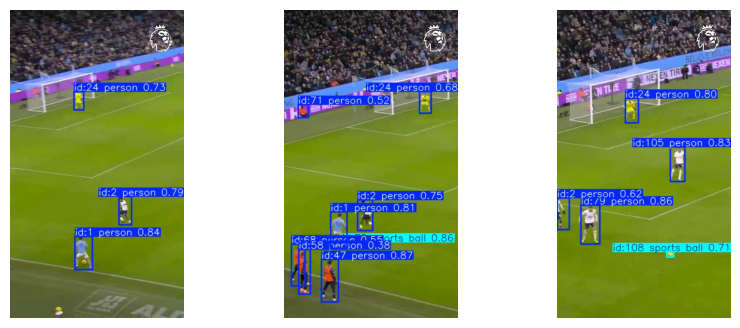

In [12]:
import matplotlib.pyplot as plt
import cv2

imgs = [cv2.cvtColor(cv2.imread(f"frame{i}.png"), cv2.COLOR_BGR2RGB)
        for i in range(3)]

plt.figure(figsize=(10,4))
for i,img in enumerate(imgs):
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis("off")

plt.savefig("qualitative_results.png", dpi=400, bbox_inches="tight")
plt.show()
